<a href="https://colab.research.google.com/github/ZhangYizhe/PythonForDataAnalysis/blob/main/HK_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties

# cnfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/FangZhengHeiTiJianTi.ttf')

In [3]:
chineseCalendar = pd.read_csv('/content/二十四节气.csv')
# chineseCalendar['Date'] = chineseCalendar['Date'].astype('string')

chineseCalendar['month'] = chineseCalendar['Date'].str.replace('月', '/').str.replace('日', '').str.split('/',expand=True)[0]
chineseCalendar['day'] = chineseCalendar['Date'].str.replace('月', '/').str.replace('日', '').str.split('/',expand=True)[1]
chineseCalendar = chineseCalendar.drop(columns=['Date'])

# chineseCalendar

In [4]:
def getData(url):
  df = pd.read_csv(url)
  df['年/Year'] = df['年/Year'].astype('string')
  df['月/Month'] = df['月/Month'].astype('string')
  df['日/Day'] = df['日/Day'].astype('string')
  # df['date'] = df['日/Day'] + '/' + df['月/Month'] + '/' + df['年/Year']
  # df['date'] = df['date'].astype('object')
  # df = df.drop(columns=['年/Year', '月/Month', '日/Day', '數據完整性/data Completeness'])
  # df.set_index('date', inplace=True)

  df = df.drop(columns=['數據完整性/data Completeness'])
  df = df.rename(columns={'年/Year':'year', '月/Month':'month', '日/Day':'day', '數值/Value':'temperature'})
  df['temperature'] = df['temperature'].replace('***', np.nan)
  df['temperature'] = df['temperature'].astype('float')
  df.set_index('year', inplace=True)
  return df

In [5]:
averageTemperatureDF = getData('/content/CLMTEMP_HKO_.csv')['1980':'2020']
lowTemperatureDF = getData('/content/日最低氣溫(攝氏度).csv')['1980':'2020']
highTemperatureDF = getData('/content/日最高氣溫(攝氏度) .csv')['1980':'2020']

In [6]:
totalDF = averageTemperatureDF
totalDF = totalDF.rename(columns={'temperature' : 'average'})
totalDF['low'] = lowTemperatureDF['temperature']
totalDF['high'] = highTemperatureDF['temperature']

In [7]:
def dataProcess(df):
  frame = pd.DataFrame()
  for ccrow in chineseCalendar.iterrows():
    month = ccrow[1]['month']
    day = ccrow[1]['day']

    row = df.loc[(df['month'] == month) & (df['day'] == day)].copy()
    row.reset_index(drop=True, inplace=True)
    row['date'] = row['day'] + '/' + row['month']
    row = row.drop(columns=['day', 'month'])
    frame = frame.append(row)
  frame.set_index('date', inplace=True)

  return frame

datas = {}
yearRange = range(1980, 2021)
for i in yearRange:
  year = '{year}'.format(year=i)
  processData = dataProcess(totalDF[year:year])
  for item in processData.iterrows():
    date = item[0]
    if date not in datas:
      datas[date] = []
    datas[date].append(item[1]['average'])

datas = pd.DataFrame(datas).T

tempIndex = 0
years = {}
for i in yearRange:
  years[tempIndex] = i
  tempIndex += 1

datas = datas.rename(columns=years)

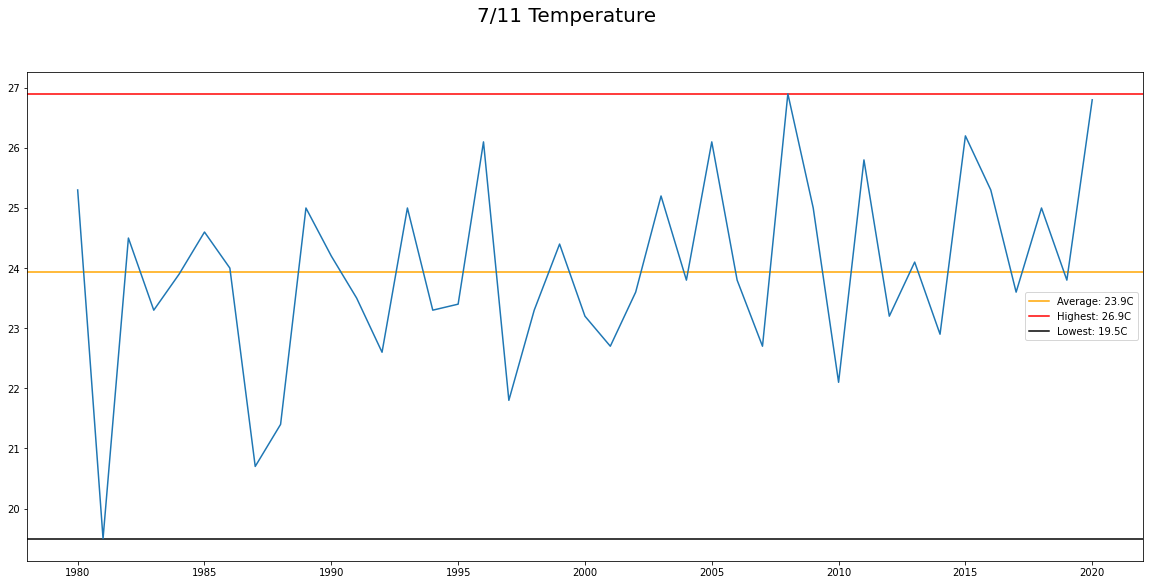

In [47]:
def specialDate(date, title):
  average = datas.loc[date].mean()
  high = datas.loc[date].max()
  min = datas.loc[date].min()
  specialDates = datas.loc[date]

  fig = plt.figure(figsize=(20,9))
  plt.axhline(y=average, color='orange', label='Average: {temperature:.1f}C'.format(temperature=average))
  plt.axhline(y=high, color='red', label='Highest: {temperature:.1f}C'.format(temperature=high))
  plt.axhline(y=min, color='black', label='Lowest: {temperature:.1f}C'.format(temperature=min))
  plt.plot(specialDates.index, specialDates.values)
  fig.suptitle(title,fontsize=20)
  plt.legend()  

specialDate('7/11', '7/11 Temperature')

In [10]:
totalDF.head()

,month,day,average,low,high
year,,,,,
1980,1,1,18.8,17.4,21.7
1980,1,2,19.2,17.5,22.4
1980,1,3,19.4,17.3,23.3
1980,1,4,18.1,14.4,21.1
1980,1,5,15.1,12.7,16.9


No handles with labels found to put in legend.


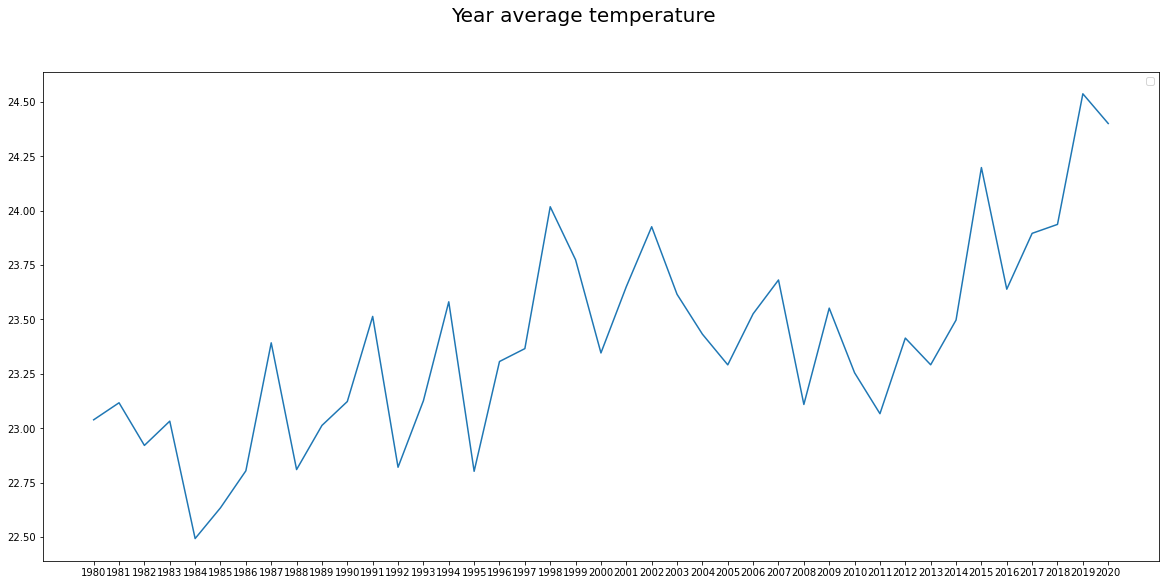

In [45]:
def yearAverageTemperature(year):
  data = totalDF.loc[year]['average'].mean()
  return year, data

yearsAverageDatas = {}

for i in range(1980, 2021):
  tempYear, tempYearTemperature = yearAverageTemperature("{year}".format(year=i))
  yearsAverageDatas[tempYear] = tempYearTemperature

yearsAverageDatas = pd.Series(yearsAverageDatas)


fig = plt.figure(figsize=(20,9))
plt.plot(yearsAverageDatas.index, yearsAverageDatas.values)
fig.suptitle('Year average temperature',fontsize=20)
plt.legend()